In [1]:
from scipy.cluster.vq import whiten
import pandas as pd
import numpy as np

df = pd.DataFrame(data = np.array([np.random.randint(0,100,100),
                                  np.random.randint(-20,180,100)]
                                   ).reshape(-1, 2),
                 columns = ['x', 'y'])
df[['scaled_x', 'scaled_y']] = whiten(df)
df.head()

,x,y,scaled_x,scaled_y
0,62,22,1.251707,0.430095
1,4,96,0.080755,1.876779
2,72,84,1.453595,1.642182
3,53,4,1.070007,0.078199
4,45,32,0.908497,0.625593


## 1. Basics of k-means clustering
Hi everyone! Now that you are familiar with hierarchical clustering, let us move on to k-means clustering. In the [first chapter](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Clustering%20%26%20Segmentation/Cluster%20Analysis/Introduction%20to%20Clustering.ipynb), we had a look at the algorithm behind k-means clustering - in this chapter, we will focus on the various parameters and their implications on the clustering results. Let's get started!

#### Why k-means clustering?
We explored a critical issue in hierarchical clustering in the last chapter - **runtime**. 

This chapter discusses a new clustering technique, [K-means clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), which allows you to **cluster large datasets in a fraction of the time**.

- Step 1: Generate cluster centers
To perform K-Means clustering in `scipy`, there are two steps involved - generate the cluster centers and then assign the cluster labels. 

>> The first step is performed by the kmeans method. 

In [2]:
from scipy.cluster.vq import kmeans

# kmeans(observation, k_or_guess, iter, thres, check_finite)

There are 5 `arguments` for this method. 
- The first argument is the list of observations, which have been standardized through the whiten method. 
- The second argument, `k_or_guess`, is the number of clusters. 
- The `next argument` is the `number of iterations` of the algorithm to perform. Its default value is 20. 
- The `fourth argument` is the `threshold`. 

>> The idea behind this argument is that the algorithm is terminated if the change in distortion since the last k-means iteration is less than or equal to the threshold. Its default value is `10e-5`, or `0.00001`. 

- The `last argument` is a boolean value indicating if a check needs to be performed on the data for the presence of infinite or NaN values. 

>> The default value is **True**, which ensures that data points with NaN or infinite values are not considered for classification, which ensures that the results are accurate and unbiased. 

The k-means function **returns** two arguments, the `cluster centers` and `distortion`. 

The cluster centers, is also known as the code book. You will notice that k-means runs really quickly as compared to hierarchical clustering as the number of operations is considerably less in k-means clustering.

- How is distortion calculated?
The distortion is calculated as the sum of square of distances between the data points and cluster centers, as demonstrated in this figure.

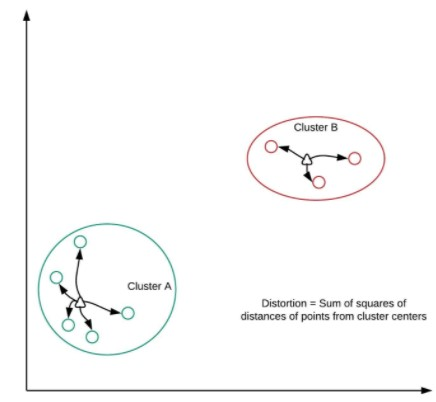

In [3]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

- Step 2: Generate cluster labels

        vq(observations, code_book, check_finite = True)

>> The next step is to use the vq method to generate cluster labels. It takes three arguments. 

            The first argument is the list of observations, which have been standardized through the whiten method. 
            The second argument is the code book, that is the first output of the kmeans method. 
            The third optional argument is check_finite, a boolean value indicating if a check needs to be performed on the data for the presence of infinite or NaN values. 
                By default, its value is set to True. 
>> The function returns the cluster labels, also known as the "code book index" and the distortion.

#### A note on distortions
Let us explore distortions further. 
- `kmeans` returns a *single value of distortions* based on the overall data, 
- whereas `vq` returns a *list of distortions*, one for each data point. The mean of the list of distortions from the vq method should approximately equal the distortion value of the kmeans method if the same list of observations is passed.

#### Running k-means
Let us run k-means in Python. 
- First, we import kmeans and vq. 
- Then, we use the kmeans to get cluster centers and vq to get cluster labels. 

In [4]:
# First
from scipy.cluster.vq import kmeans, vq
# Second
clusters_centers, _ = kmeans(df[['scaled_x', 'scaled_y']], 3)
df['cluster_labels'], _ = vq(df[['scaled_x', 'scaled_y']] , clusters_centers)

- Then, we display a scatter plot with seaborn.

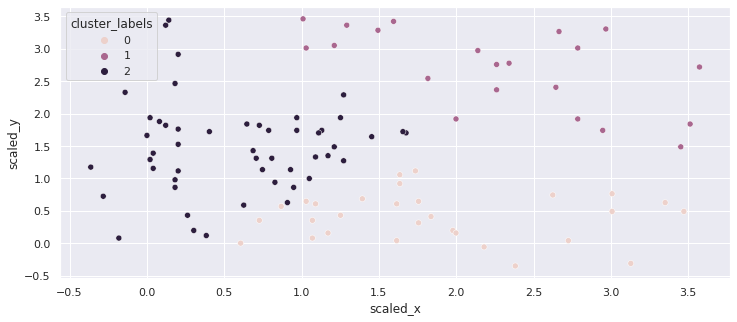

In [5]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 5))
sns.scatterplot(x = 'scaled_x', y = 'scaled_y', hue = 'cluster_labels', data = df, ax = ax)
plt.show()

### 1.2. PRACTICES
#### Exercise 1.2.1. K-means clustering: first exercise
This exercise will familiarize you with the usage of k-means clustering on a dataset. 

Let us use the Comic Con dataset and check how k-means clustering works on it. The data is stored in a Pandas data frame, `comic_con`. `x_scaled` and `y_scaled` are the column names of the standardized `X` and `Y` coordinates of people at a given point in time.

In [6]:
comic_con = pd.DataFrame({'x_coordinate': np.array([17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87,
                                                       83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 
                                                        27, 17, 17]),
                          'y_coordinate': np.array([  4,   6,   0,   0,   4,   3,   1,   6,   5,   4,   6,  10,   8,
                                                        10,  97,  94,  99,  95,  95,  97,  99,  99,  94,  99,  90, 
                                                        98, 100,  93,  98,  15,  10,   0,  10,   7,  17,  15])
                         })
comic_con[['x_scaled', 'y_scaled']] = whiten(comic_con)
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


Recall the two steps of k-means clustering:

- Define cluster centers through `kmeans()` function. It has two required arguments: `observations` and `number of clusters`.
- Assign cluster labels through the `vq()` function. It has two required arguments: `observations` and `cluster centers`.

#### SOLUTION

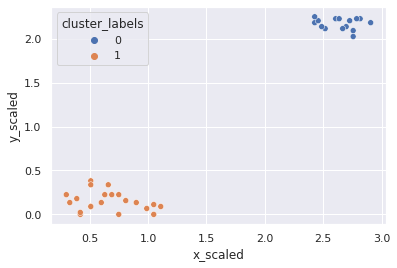

In [7]:
# Generate cluster centers with 2 clusters
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

**Comments.** Notice that the clusters formed are exactly the same as hierarchical clustering that you did in the [previous chapter](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/Clustering%20%26%20Segmentation/Cluster%20Analysis/Hierarchical%20Clustering.ipynb).

#### Exercise 1.2.2. Runtime of k-means clustering
Recall that it took a significantly long time to run hierarchical clustering. How long does it take to run the `kmeans()` function on the FIFA dataset?

In [8]:
fifa = pd.read_csv(r"../input/cluster-dataset/fifa_18_dataset.csv")
fifa[['scaled_sliding_tackle', 'scaled_aggression']] = whiten(fifa)
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,1.070924,3.609257
1,26,48,1.210610,2.749910
2,33,56,1.536544,3.208228
3,38,78,1.769353,4.468604
4,11,29,0.512181,1.661404


- The data is stored in a Pandas data frame, `fifa`. 
- `scaled_sliding_tackle` and `scaled_aggression` are the relevant scaled columns. 
- `timeit` and `kmeans` have been imported.

In [9]:
import timeit

Cluster centers are defined through the `kmeans()` function. It has two required arguments: observations and number of clusters. 

- You can use `%timeit` before a piece of code to check how long it takes to run. 
- You can time the `kmeans()` function for three clusters on the fifa dataset.

#### Answers.

In [10]:
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 2)

118 ms ± 3.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 2. How many clusters?
In the earlier chapter, we analyzed the dendrogram to determine how many clusters were present in the data. This section talks of a way of **determining the number of clusters in `k-means` clustering**.

#### How to find the right k?
One critique of `k-means clustering` is that there is no right way of finding out how many clusters exist in your dataset. 

There are certain indicative methods, and this chapter discusses one such method: constructing an elbow plot to decide the right number of clusters for your dataset.

#### Distortions revisited
Recall our discussion on distortions,
- The `distortion` is the **sum of the squares of distances** between each data point and its cluster center. 
- Ideally, distortion has an inverse relationship with the number of clusters - **which means that distortion decreases with increasing number of clusters**. 
- This trend is intuitive - as **segmenting the data into smaller fragments will lead to clusters being closer together**, leading to a lower distortion.

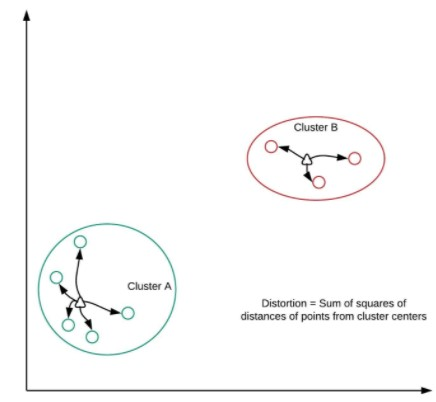

In [11]:
## Hình minh họa Image(fig1, height, width)

This is the underlying logic of the elbow method, which is a **line plot between the number of clusters and** their corresponding **distortions**.
#### Elbow method
We first run `k-means` clustering with a varying number of clusters on the data, and construct an elbow plot, which has the number of clusters on the x-axis and distortion on the y-axis. 
- The number of clusters can start from one to the number of data points. 
- The ideal point is one beyond which the distortion decreases relatively less on increasing the number of clusters. 

Let us look at the code and a sample plot to better understand how to do this.

In [12]:
# Declare vrs
distortions = []
nb_clusters = range(1, 7)

# Population distortions for various cluster 
for nb in nb_clusters:
    centroids, distortion = kmeans(df[['scaled_x', 'scaled_y']], nb)
    distortions.append(distortion)

In this code, we prepare the data to construct an elbow plot. To do so, we 
- First decide the range of number of clusters that we would like to run the algorithm for. In this case, cluster sizes range from 2 to 6. 
- Next, we collect the distortion from each run of the k-means method and plot the two lists using seaborn.
- We run the k-means method for each cluster and collect the corresponding distortions in a list for use later. 
- In the final step, we create a data frame with the distortions for each number of clusters and plot it using seaborn, with number of clusters on x axis and distortion on y axis.

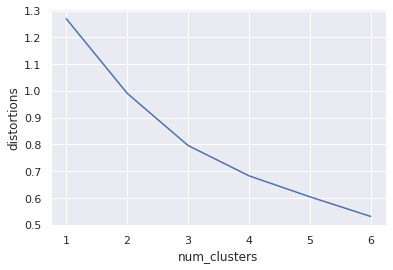

In [13]:
elbow_plot_data = pd.DataFrame({'num_clusters': nb_clusters,
                                'distortions': distortions})
sns.lineplot(x = 'num_clusters', y = 'distortions', data = elbow_plot_data)
plt.show()

#### Final thoughts on using the elbow method
Before completing this section, I would like to emphasize that the elbow method only gives an indication of ideal number of clusters. 
- Occasionally, it may be insufficient to find an **optimal k-clusters**. For instance, the elbow method fails when data is evenly distributed. 
- There are other methods to find the optimal number of clusters such as the `average silhouette` and `gap statistic methods`. 
- They are indicative methods too, and will not be discussed as a part of this course.

### 2.2. PRACTICES
#### Exercise 2.2.1. Elbow method on distinct clusters
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a Pandas data frame, `comic_con`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time.
#### SOLUTION

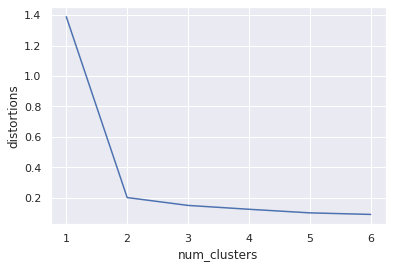

In [14]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

Hence, the best **k_clusters** is 2.

#### Exercise 2.2.2. Elbow method on uniform data
In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.
#### SOLUTION.

In [15]:
x = np.array([39, 42, 58, 43, 13, 32, 60, 13, 26, 27, 29, 51, 14, 50, 62, 59, 50,
       62, 65, 17, 25, 45, 55, 48, 42, 58, 68, 58, 37, 55])
y = np.array([3, 7, 3, 3, 6, 5, 3, 4, 0, 9, 6, 3, 0, 7, 4, 1, 3, 0, 2, 5, 9, 5,
       8, 6, 3, 1, 4, 2, 8, 7])
uniform_data = pd.DataFrame({'x': x, 'y': y})
uniform_data[['x_scaled', 'y_scaled']] = whiten(uniform_data)
uniform_data.head()

,x,y,x_scaled,y_scaled
0,39,3,2.376199,1.152237
1,42,7,2.558984,2.688554
2,58,3,3.533835,1.152237
3,43,3,2.619912,1.152237
4,13,6,0.792066,2.304475


The data is stored in a Pandas data frame, `uniform_data`. `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of points.
#### SOLUTION.

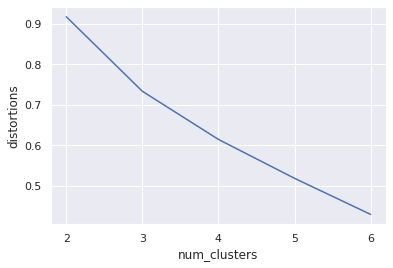

In [16]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Comments.** From the elbow plot, there is no well defined elbow in this plot!

## 4. Limitations of k-means clustering
You have learnt about k-means clustering in SciPy in earlier exercises. We will now focus on the limitations of this clustering method and how you should proceed with caution while using k-means clustering.
### 4.1. Theory
#### Limitations of k-means clustering
Earlier, we saw that k-means clustering overcomes the biggest drawback of hierarchical clustering, runtime. However, it comes with its own set of limitations which you should consider while using it. 
- The first issue is the procedure to find the **right number of clusters**, k. As discussed earlier, the elbow method is one of the ways to determine the right k, but may not always work. 
- The next limitation of k-means clustering is the **impact of seeds on clustering**, which we will explore shortly.
- The final limitation that we will explore is the **formation of equal-sized clusters**.

#### Impact of seeds
Let us look at the impact of seeds on the resulting clusters. 

In [17]:
from numpy.random import seed
seed(12)

As the process of defining the initial cluster centers is random, this initialization can affect the final clusters. Therefore, to get consistent results when running k-means clustering on the same dataset multiple times, it is a good idea to set the initialization parameters for random number generation. 

The seed is initialized through the seed method of random class in numpy. 

You can pass a **single integer** or a **1D array** as an argument.

Let us see the results of k-means clustering when we pass two different seeds before running the algorithm. For the purposes of testing, we take a list of randomly generated 200 points and use five clusters. 

It is seen that in the two cases the cluster sizes are different.

| seed | cluster_sizes |            
|:-:|-|
| `np.array([1000, 2000])` | 29, 29, 43, 47, 52 |
| `np.array([1,2,3])` | 26, 31, 40, 50, 53 |

Let us see the plots.

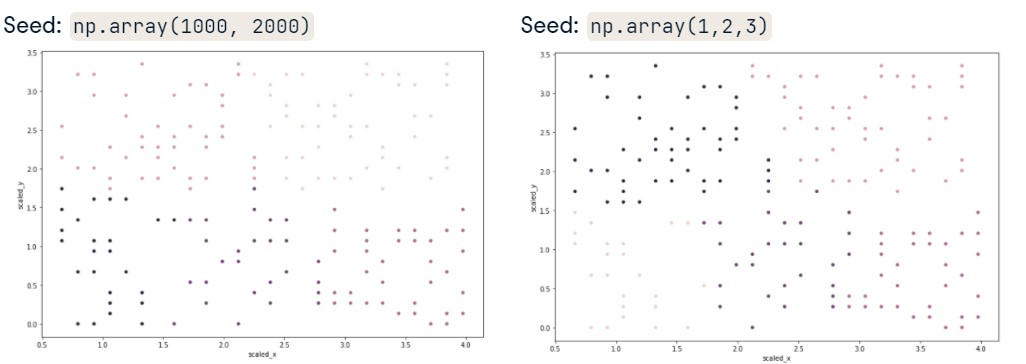

In [18]:
## Hình minh họa Image(fig1, height, width)

Here are the plots to compare the resulting clusters. You will notice that many points along the cluster boundaries have interchanged clusters. Interestingly, the effect of seeds is only seen when the data to be clustered is fairly uniform. If the data has distinct clusters before clustering is performed, the effect of seeds will not result in any changes in the formation of resulting clusters.

#### Uniform clusters in k means
To illustrate the bias in kmeans clustering towards uniform clusters to minimize variance, let us perform clustering on this set of 280 points, divided into non uniform groups of 200, 70 and 10. Graphically, they look distinctly separated into three clusters. Therefore, if we ran any clustering algorithm, these three clusters should be picked up. Let us test that theory with kmeans clustering first.

#### Uniform clusters in k-means: a comparison
If you look at the results of k-means clustering on this data set, you get non intuitive clusters even after varying the seeds. This is because the very idea of k-means clustering is to minimize distortions. This results in clusters that have similar areas and not necessarily the similar number of data points. However, when you look at the results of hierarchical clustering on the same dataset using the complete method to decide cluster proximity, you will notice that the clusters formed are intuitive and consistent with our assumption in the earlier slide.

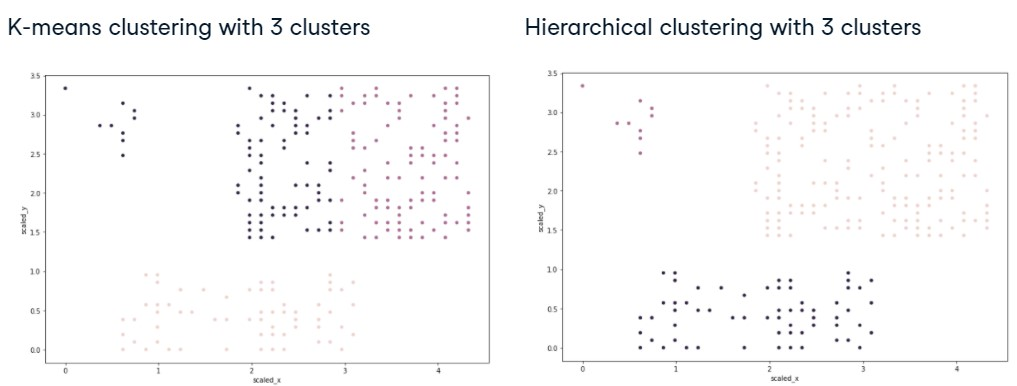

In [19]:
## Hình minh họa Image(fig1, height, width)

#### Final thoughts
Finally, we realize that each technique has its pros and cons, and you should know about the underlying assumptions of each technique before applying them. Ideally, you should spend some time pondering over your data size, its patterns and resources and time available to you before finalizing on an algorithm. Remember, clustering is still the exploratory phase of your analysis - it is perfectly fine for some trial and error at this stage.

### 3.2. PRACTICES
#### Exercise 3.2.1. Impact of seeds on distinct clusters
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

- The data is stored in a Pandas data frame, `comic_con`. 
- `x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time.

#### SOLUTION.

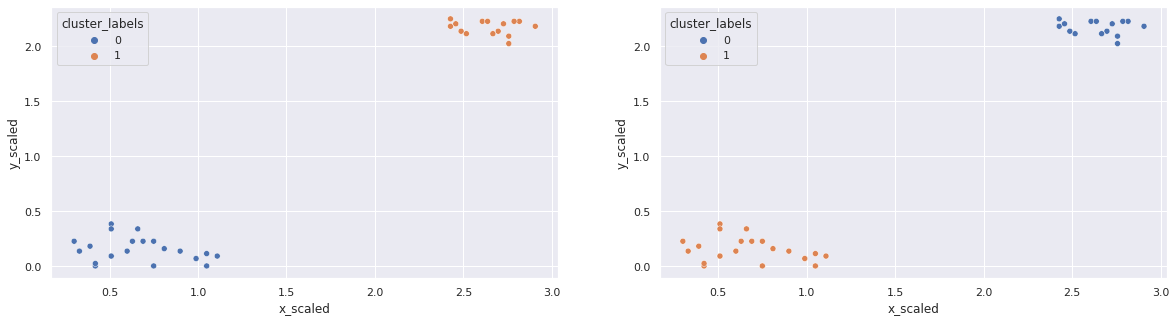

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
# Initialize seed with the integer 0
seed(0)
# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con, ax = ax[0])

# seed is initialized with a list [1, 2, 1000]
seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con, ax = ax[1])
plt.show()

**Comments.** Notice that the plots have not changed after changing the seed as the clusters are well-defined!!

#### Exercise 3.2.2. Uniform clustering patterns
Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

Here is how a typical mouse-like dataset looks like [(Source)](https://www.researchgate.net/figure/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids_fig3_256378655).

In [21]:
mouse = pd.read_csv('mouse.csv', usecols = ['x_scaled', 'y_scaled'])
mouse.head()

,x_scaled,y_scaled
0,2.209458,2.977524
1,2.492083,2.727011
2,2.331103,3.808208
3,2.122806,3.794948
4,4.047935,3.130303


The data is stored in a Pandas data frame, mouse. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of the data points.

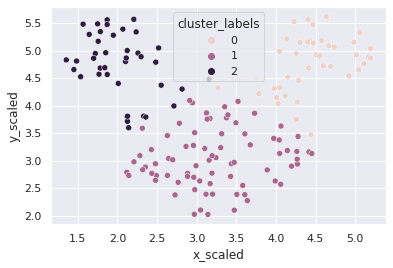

In [22]:
# Generate cluster centers with 3 clusters
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

**Comments.** Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.

#### Exercise 3.2.3. FIFA 18: defenders revisited
In the FIFA 18 dataset, various attributes of players are present. 

In [23]:
fifa = pd.read_csv(r"../input/cluster-dataset/fifa_18_sample_data.csv")
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


Two such attributes are:

- `(def) defending`: a number which signifies the defending attributes of a player
- `(phy) physical`: a number which signifies the physical attributes of a player
These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

In [24]:
fifa[['scaled_def', 'scaled_phy']] = whiten(fifa[['def', 'phy']])

The following modules have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns. The data for this exercise is stored in a Pandas dataframe, fifa. The scaled variables are scaled_def and scaled_phy.
#### SOLUTION

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


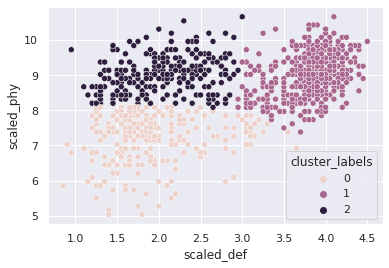

In [25]:
# Set up a random seed in numpy
seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

**Comments.** Notice that the seed has an impact on clustering as the data is uniformly distributed.